### CA1 Regression Assignment
##### Instructions : 
   Objective: Compare a Linear Regression (LSE) model with a Ridge Regression model using custom cross-validation to determine which one is the best fit for your multi-linear regression problem and assess accuracy.


In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os 


We begin with 

In [97]:
data_path = os.path.join(os.getcwd(),'dataset','Cancerdata.txt')
cancer = pd.read_csv(data_path, sep='\t')
cancer.set_axis(['index','logCancerVol', 'logCancerWeight','age','logBenighHP','svi','logCP','gleasonScore','gleasonS45','levelCancerAntigen', 'train'], axis=1)
cancer = cancer.replace('?', np.nan)
cancer = cancer.dropna()
cancer = cancer.drop(['index'], axis=1)

cancer 


,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [98]:
# Your code goes here
print('Number of samples: {}, number of attributes: {}'.format(cancer.shape[0], cancer.shape[1]))

Number of samples: 97, number of attributes: 10


In [99]:
cancer.describe()

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [100]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   logCancerVol        97 non-null     float64
 1   logCancerWeight     97 non-null     float64
 2   age                 97 non-null     int64  
 3   logBenighHP         97 non-null     float64
 4   svi                 97 non-null     int64  
 5   logCP               97 non-null     float64
 6   gleasonScore        97 non-null     int64  
 7   gleasonS45          97 non-null     int64  
 8   levelCancerAntigen  97 non-null     float64
 9   train               97 non-null     object 
dtypes: float64(5), int64(4), object(1)
memory usage: 7.7+ KB


In [101]:
cancer['train'].value_counts()


T    67
F    30
Name: train, dtype: int64

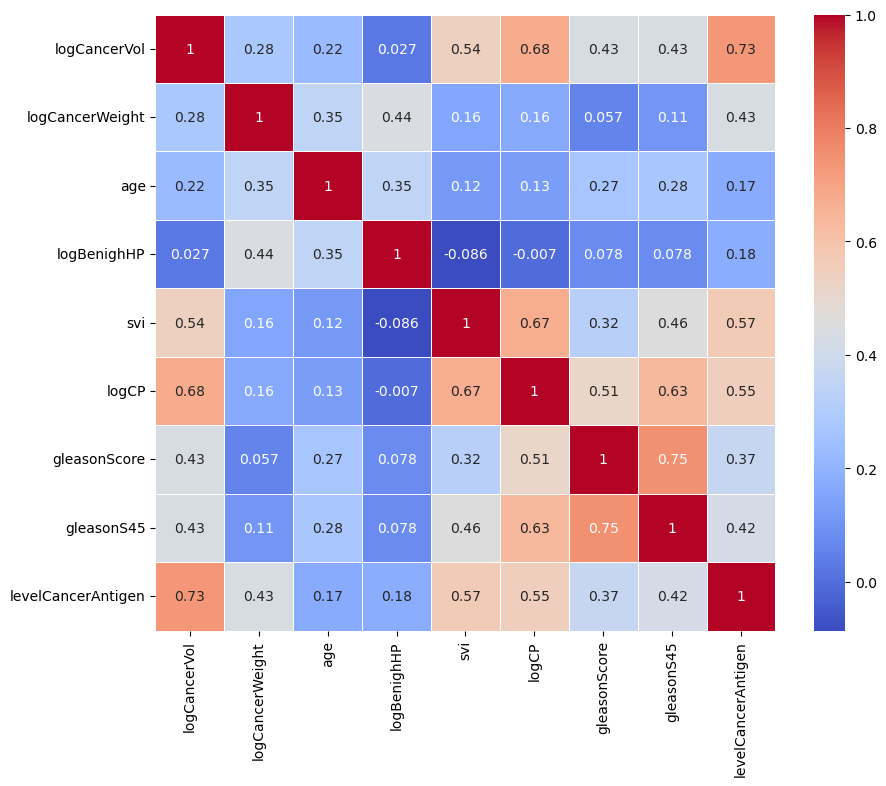

In [102]:

import matplotlib.pyplot as plt
# Selected columns for pair plots
selected_columns = ['logCancerVol', 'logCancerWeight', 'age', 'logBenighHP', 'svi', 'logCP', 'gleasonScore', 'gleasonS45', 'levelCancerAntigen']
correlation_matrix = cancer[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

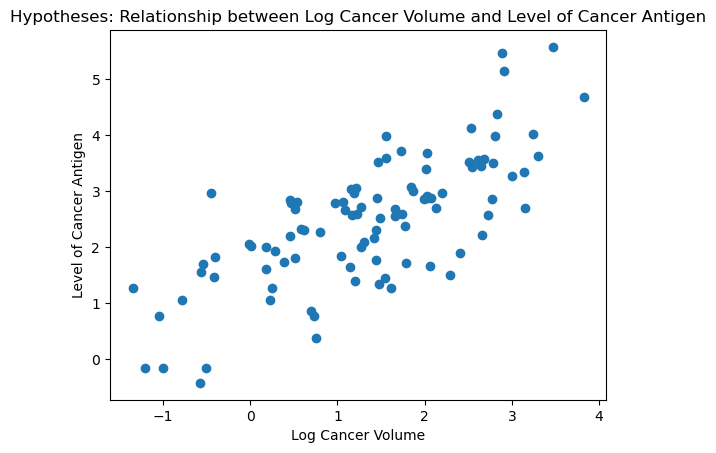

In [130]:


# Assuming 'cancer' is your dataset
plt.scatter(cancer['logCancerVol'], cancer['levelCancerAntigen'])
plt.xlabel('Log Cancer Volume')
plt.ylabel('Level of Cancer Antigen')
plt.title('Hypotheses: Relationship between Log Cancer Volume and Level of Cancer Antigen')
plt.show()


In [104]:
# Splitting the data based on the 'train' column
X_train, X_test = cancer[cancer['train'] == 'T'], cancer[cancer['train'] == 'F']

# Splitting the data into X and y
y_train, y_test = X_train.pop('levelCancerAntigen').values, X_test.pop('levelCancerAntigen').values

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))

X_train, X_test = X_train.drop('train', axis=1), X_test.drop('train', axis=1)

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))






X_train shape: (67, 9), y_train shape: (67,)
X_train shape: (67, 8), y_train shape: (67,)


In [105]:
import numpy as np

# Assuming you have a numpy array X_train
mean_values = np.mean(X_train, axis=0)  # Calculate mean for each feature
std_values = np.std(X_train, axis=0)    # Calculate standard deviation for each feature

# Standardize the training data
X_train_standardized = (X_train - mean_values) / std_values

# Standardize the test data using the same mean and standard deviation as the training data
X_test_standardized = (X_test - mean_values) / std_values


In [106]:
print("Description of Standardized Training Data:\n", X_train_standardized.describe())
print("\nDescription of Standardized Test Data:\n", X_test_standardized.describe())


Description of Standardized Training Data:
        logCancerVol  logCancerWeight           age   logBenighHP  \
count  6.700000e+01     6.700000e+01  6.700000e+01  6.700000e+01   
mean   3.314099e-18    -1.932119e-15 -7.995263e-16  6.628197e-17   
std    1.007547e+00     1.007547e+00  1.007547e+00  1.007547e+00   
min   -2.157304e+00    -2.645075e+00 -3.189126e+00 -1.003472e+00   
25%   -6.691190e-01    -6.252199e-01 -5.031242e-01 -1.003472e+00   
50%    1.251804e-01    -5.798078e-02  3.407614e-02 -8.448679e-02   
75%    8.396889e-01     5.443671e-01  5.712765e-01  1.016091e+00   
max    2.033202e+00     2.440170e+00  1.914277e+00  1.552196e+00   

                svi         logCP  gleasonScore    gleasonS45  
count  6.700000e+01  6.700000e+01  6.700000e+01  6.700000e+01  
mean  -2.717561e-16  3.380381e-16  6.114512e-16  6.628197e-17  
std    1.007547e+00  1.007547e+00  1.007547e+00  1.007547e+00  
min   -5.370862e-01 -8.430840e-01 -1.039499e+00 -9.032532e-01  
25%   -5.370862e-01 -8.

In [107]:
print('Number of instances in X_train: {}'.format(X_train_standardized.shape[0]))
print('Number of instances in X_test: {}'.format(X_test_standardized.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train_standardized.shape[0] + X_test_standardized.shape[0]))



Number of instances in X_train: 67
Number of instances in X_test: 30
Number of instances in X_train and X_test together: 97


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the model
lm = LinearRegression().fit(X_train_standardized, y_train)

# Display training accuracy, coefficients, and intercept
print(f'Training accuracy (R-squared): {lm.score(X_train_standardized, y_train):.3f}')
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_:.3f}')

# Calculate and display MSE for training and test data
print(f'Training MSE: {mean_squared_error(y_train, lm.predict(X_train_standardized)):.3f}')
print(f'Test MSE: {mean_squared_error(y_test, lm.predict(X_test_standardized)):.3f}')



Training accuracy (R-squared): 0.694
Coefficients: [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]
Intercept: 2.452
Training MSE: 0.439
Test MSE: 0.521


In [109]:
from sklearn.metrics import r2_score

# Calculate testing accuracy and R^2 score
y_test_pred = lm.predict(X_test_standardized)
test_accuracy = lm.score(X_test_standardized, y_test)
r2_test = r2_score(y_test, lm.predict(X_test_standardized))
mse = mean_squared_error(y_test, y_test_pred)

# Print results
print(f'Testing accuracy: {test_accuracy:.3f}')
print(f'R^2 score: {r2_test:.3f}')
print(f'Test MSE: {mse:.3f}')



Testing accuracy: 0.503
R^2 score: 0.503
Test MSE: 0.521


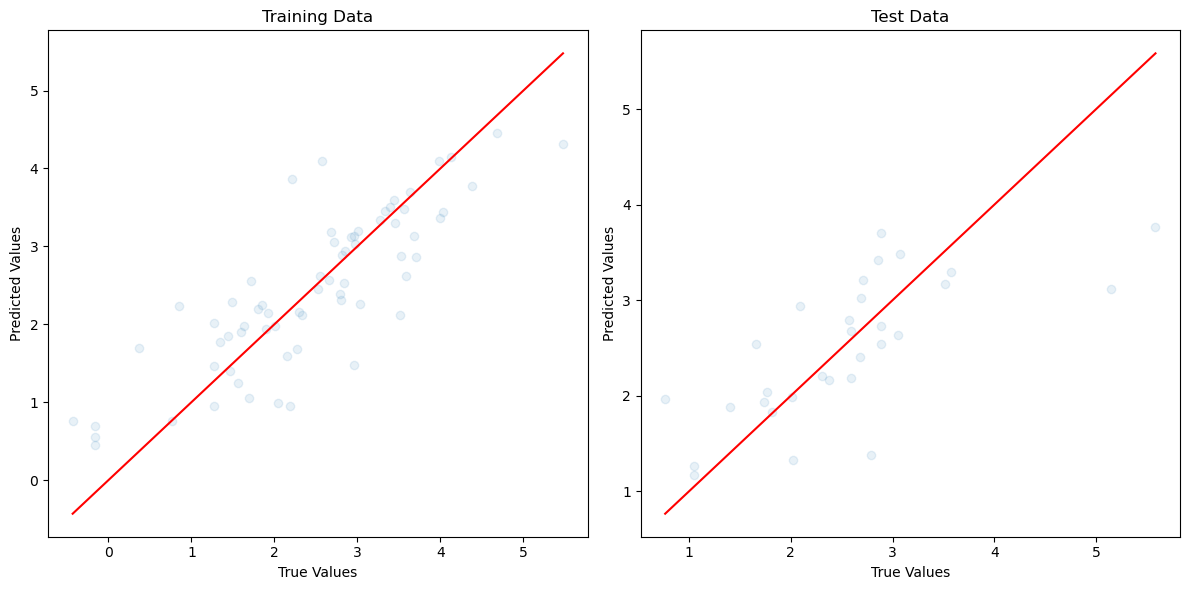

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predictions
y_train_pred = lm.predict(X_train_standardized)
y_test_pred = lm.predict(X_test_standardized)

# Plotting
plt.figure(figsize=(12, 6))
titles = ['Training Data', 'Test Data']

for i, (true, pred, title) in enumerate(zip([y_train, y_test], [y_train_pred, y_test_pred], titles)):
    plt.subplot(1, 2, i + 1)
    plt.scatter(true, pred, alpha=0.1)
    plt.plot([min(true), max(true)], [min(true), max(true)], color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

plt.tight_layout()


plt.show()



In [111]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# initialise the ridge  and fit the model
ridge_regression = Ridge(alpha=0.008653827670978624, random_state=42)


ridge_regression.fit(X_train_standardized, y_train)

# Predict on the test data
y_test_pred = ridge_regression.predict(X_test_standardized)

# Calculate MSE and R-squared
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f'MSE: {mse_test:.3f}')
print(f'R-squared: {r2_test:.3f}')
print(f'Ridge Regression Coefficients: {ridge_regression.coef_}')
print(f'Ridge Regression Intercept: {ridge_regression.intercept_}')


MSE: 0.521
R-squared: 0.503
Ridge Regression Coefficients: [ 0.71080537  0.29044422 -0.14141763  0.21040226  0.30724901 -0.28654043
 -0.02066523  0.27508509]
Ridge Regression Intercept: 2.452345085074627


In [123]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge

def cross_validate(model, X_train_standardized, y_train, n_folds=5, random_seed=42):
    # Convert pandas DataFrame/Series to numpy arrays if they aren't already
    if isinstance(X_train_standardized, pd.DataFrame):
        X_train_standardized = X_train_standardized.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values

    mse_scores = []
    r2_scores = []

    num_samples = len(X_train_standardized)
    fold_size = num_samples // n_folds
    shuffled_indices = np.arange(num_samples)
    
    np.random.seed(random_seed)
    np.random.shuffle(shuffled_indices)

    for fold in range(n_folds):
        fold_start = fold * fold_size
        fold_end = (fold + 1) * fold_size
        if fold == n_folds - 1:
            fold_end = num_samples

        test_indices = shuffled_indices[fold_start:fold_end]
        train_indices = np.concatenate([shuffled_indices[:fold_start], shuffled_indices[fold_end:]])

        X_train_fold = X_train_standardized[train_indices]
        y_train_fold = y_train[train_indices]
        X_test_fold = X_train_standardized[test_indices]
        y_test_fold = y_train[test_indices]
        
        model.fit(X_train_fold, y_train_fold)
        y_test_pred_fold = model.predict(X_test_fold)
        
        mse_scores.append(mean_squared_error(y_test_fold, y_test_pred_fold))
        r2_scores.append(r2_score(y_test_fold, y_test_pred_fold))

    return mse_scores, r2_scores
#why logspace 



alpha_values = np.logspace(-6, 6, 100)

# Custom function to get the best alpha for Ridge
def get_best_alpha(X_train_standardized, y_train):
    mean_mse_values = []

    for alpha in alpha_values:
        ridge = Ridge(alpha=alpha)
        mse_scores, _ = cross_validate(ridge, X_train_standardized, y_train)
        mean_mse_values.append(np.mean(mse_scores))

    best_alpha_index = np.argmin(mean_mse_values)
    return alpha_values[best_alpha_index]

# Cross validate using LSE
lse_model = LinearRegression()
mse_scores_lse, r2_scores_lse = cross_validate(lse_model, X_train_standardized, y_train)
print ('LSE MSE scores: {}'.format(mse_scores_lse))
print('LSE Average MSE: {:.3f}'.format(np.mean(mse_scores_lse)))
print('LSE Average R-squared: {:.3f}'.format(np.mean(r2_scores_lse)))
print('LSE Coefficients: {}'.format(lse_model.coef_))
print('LSE Intercept: {}'.format(lse_model.intercept_))



best_alpha = get_best_alpha(X_train_standardized, y_train)
print(f"Best Alpha for Ridge: {best_alpha}")
best_ridge = Ridge(alpha=best_alpha, random_state=42)
mse_scores_ridge, r2_scores_ridge = cross_validate(best_ridge, X_train_standardized, y_train)
print ('\nRidge MSE scores: {}'.format(mse_scores_ridge))
print('Ridge Average MSE: {:.3f}'.format(np.mean(mse_scores_ridge)))
print('Ridge Average R-squared: {:.3f}'.format(np.mean(r2_scores_ridge)))
print('Ridge Coefficients: {}'.format(best_ridge.coef_))
print('Ridge Intercept: {}'.format(best_ridge.intercept_))




LSE MSE scores: [0.5347101512142483, 0.576752892304978, 1.4562512913406362, 0.2316560436477648, 0.23751250298219215]
LSE Average MSE: 0.607
LSE Average R-squared: 0.603
LSE Coefficients: [ 0.74249084  0.25841238 -0.08982983  0.20108662  0.28377145 -0.30944107
 -0.08432282  0.35367752]
LSE Intercept: 2.4602169503253877
Best Alpha for Ridge: 6.135907273413176

Ridge MSE scores: [0.4561577835974633, 0.5642052195476629, 1.3984481755954368, 0.3027920780409779, 0.22871635023041198]
Ridge Average MSE: 0.590
Ridge Average R-squared: 0.615
Ridge Coefficients: [ 0.58629883  0.25996762 -0.06025723  0.17796507  0.26561528 -0.12985398
 -0.01598493  0.24099115]
Ridge Intercept: 2.446198856412253


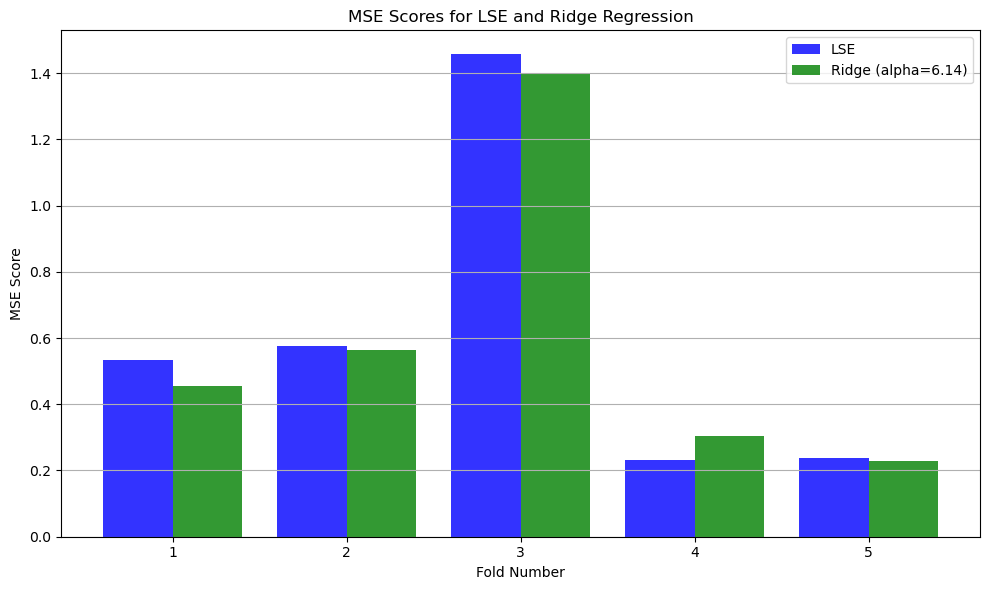

In [126]:

# Data
folds = np.arange(1, 6)
mse_lse = [0.5347101512142483, 0.576752892304978, 1.4562512913406362, 0.2316560436477648, 0.23751250298219215]
mse_ridge = [0.4561577835974633, 0.5642052195476629, 1.3984481755954368, 0.3027920780409779, 0.22871635023041198]

# Plotting LSE MSE scores
plt.figure(figsize=(10, 6))
plt.bar(folds, mse_lse, width=0.4, align='center', label='LSE', alpha=0.8, color='blue')

# Plotting Ridge MSE scores
plt.bar(folds+0.4, mse_ridge, width=0.4, align='center', label=f'Ridge (alpha={6.135907273413176:.2f})', alpha=0.8, color='green')

# Labels and Title
plt.xlabel('Fold Number')
plt.ylabel('MSE Score')
plt.title('MSE Scores for LSE and Ridge Regression')
plt.xticks(folds + 0.2, folds)  # Positioning the ticks in the middle of the bars
plt.legend()

# Display
plt.tight_layout()
plt.grid(axis='y')
plt.show()

/Users/dolorious/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/dolorious/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


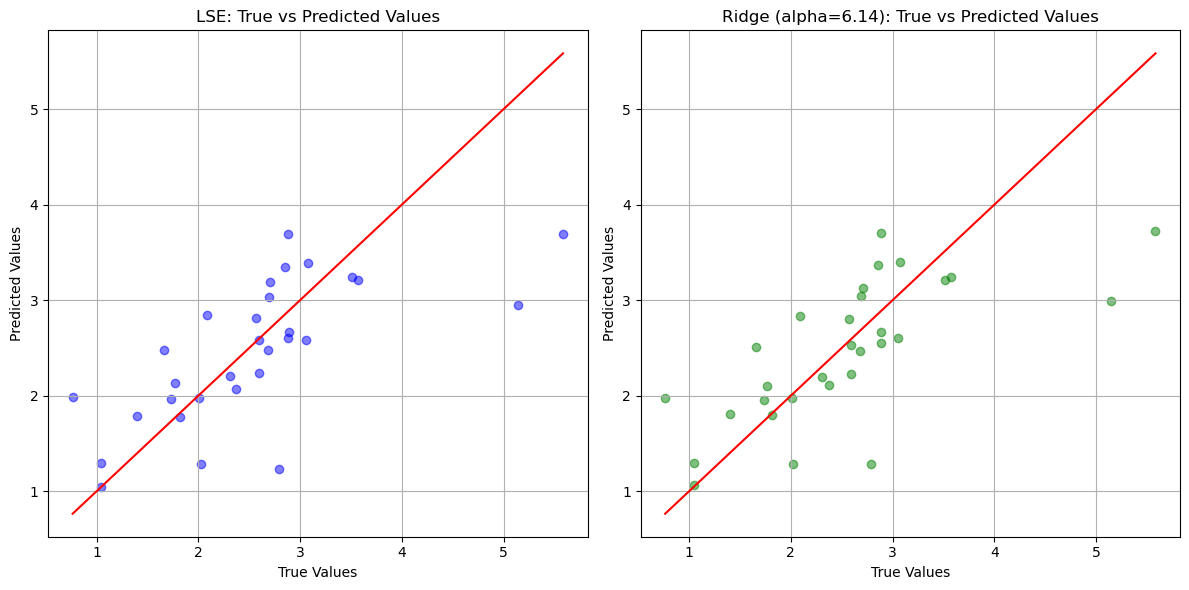

In [127]:
import matplotlib.pyplot as plt

# Assuming you've already calculated the predicted values for test data as:
# y_test_pred_lse = lse_model.predict(X_test_standardized)
# y_test_pred_ridge = ridge_regression.predict(X_test_standardized)

y_test_pred_lse = lse_model.predict(X_test_standardized)
y_test_pred_ridge = ridge_regression.predict(X_test_standardized)

# Scatter plot for LSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lse, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LSE: True vs Predicted Values')
plt.grid(True)

# Scatter plot for Ridge
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Ridge (alpha={6.135907273413176:.2f}): True vs Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


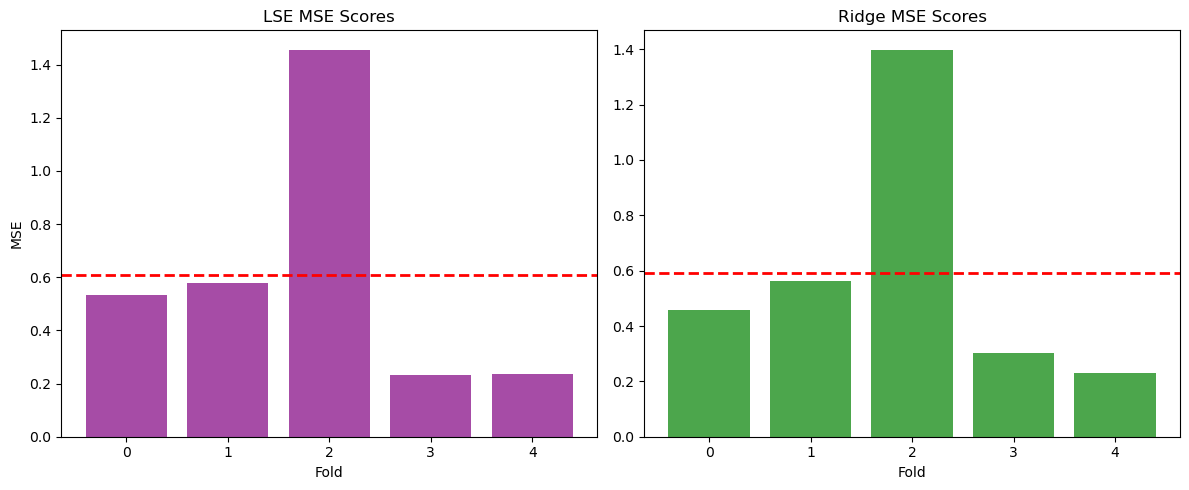

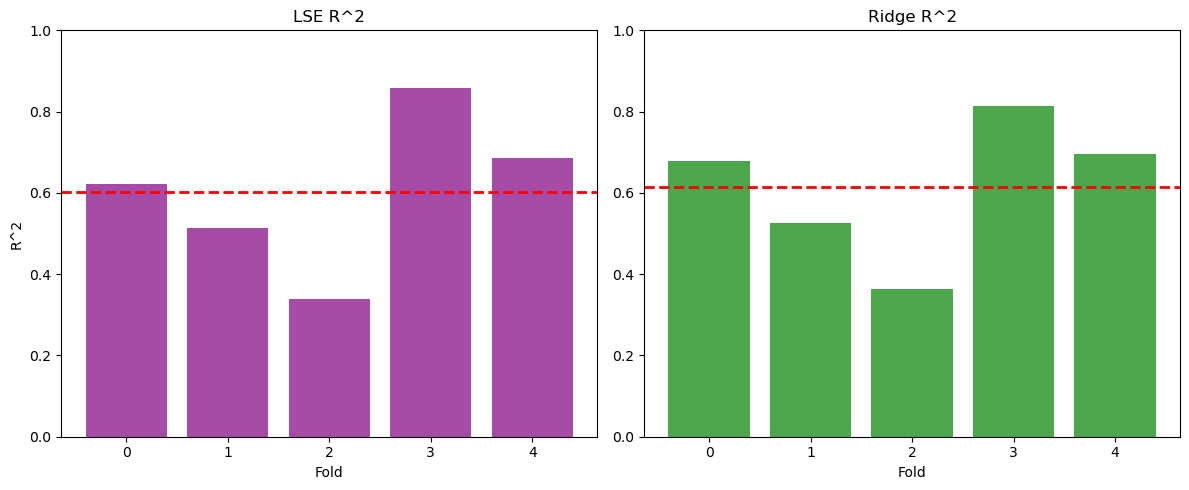

In [141]:
import matplotlib.pyplot as plt

# Plotting MSEs
plt.figure(figsize=(12, 5))

# LSE
plt.subplot(1, 2, 1)
plt.bar(range(len(mse_scores_lse)), mse_scores_lse, color='purple', alpha=0.7)
plt.axhline(np.mean(mse_scores_lse), color='red', linestyle='dashed', linewidth=2)
plt.title('LSE MSE Scores')
plt.xlabel('Fold')
plt.ylabel('MSE')

# Ridge
plt.subplot(1, 2, 2)
plt.bar(range(len(mse_scores_ridge)), mse_scores_ridge, color='green', alpha=0.7)
plt.axhline(np.mean(mse_scores_ridge), color='red', linestyle='dashed', linewidth=2)
plt.title('Ridge MSE Scores')
plt.xlabel('Fold')

plt.tight_layout()
plt.show()

# Plotting R-squared values
plt.figure(figsize=(12, 5))

# LSE
plt.subplot(1, 2, 1)
plt.bar(range(len(r2_scores_lse)), r2_scores_lse, color='purple', alpha=0.7)
plt.axhline(np.mean(r2_scores_lse), color='red', linestyle='dashed', linewidth=2)
plt.title('LSE R^2')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.ylim(0, 1)

# Ridge
plt.subplot(1, 2, 2)
plt.bar(range(len(r2_scores_ridge)), r2_scores_ridge, color='green', alpha=0.7)
plt.axhline(np.mean(r2_scores_ridge), color='red', linestyle='dashed', linewidth=2)
plt.title('Ridge R^2')
plt.xlabel('Fold')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



In [128]:
feature_names = X_train_standardized.columns.tolist()  # Assuming X_train_standardized is a DataFrame

# Display coefficients alongside feature names
for feature, coef in zip(feature_names, ridge_regression.coef_):
    print(f"{feature}: {coef}")


logCancerVol: 0.7076841304158837
logCancerWeight: 0.2607484401381297
age: -0.08437650819315455
logBenighHP: 0.1961717817504447
svi: 0.28066794142277707
logCP: -0.26739623759299486
gleasonScore: -0.06663928173906421
gleasonS45: 0.32507367266300735


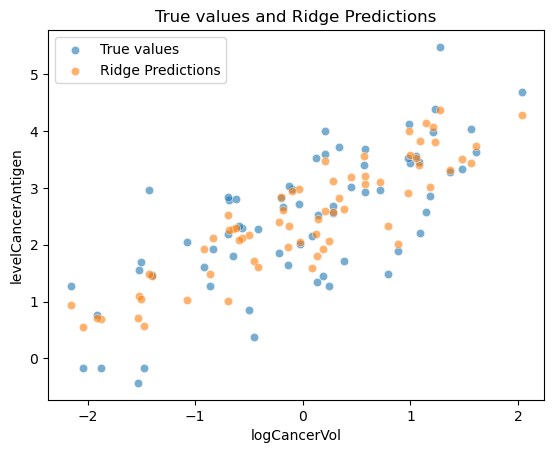

In [135]:
# Convert DataFrame to numpy array before prediction
ridge_predictions = ridge_regression.predict(X_train_standardized.values)

# For plotting, we'll need to convert the 'logCancerVol' column to a numpy array as well
logCancerVol_values = X_train_standardized['logCancerVol'].values

# Scatter plot of the true values
sns.scatterplot(x=logCancerVol_values, y=y_train, label='True values', alpha=0.6)

# Scatter plot of the Ridge regression predictions
sns.scatterplot(x=logCancerVol_values, y=ridge_predictions, label='Ridge Predictions', alpha=0.6)

plt.xlabel('logCancerVol')
plt.ylabel('levelCancerAntigen')
plt.title('True values and Ridge Predictions')
plt.legend()
plt.show()


In [136]:
import statsmodels.api as sm

# Add a constant (i.e., bias or intercept) to the predictor variables
X_with_constant = sm.add_constant(X_train_standardized)

# Fit the regression model using Ordinary Least Squares (OLS) for Ridge regression
model = sm.OLS(y_train, X_with_constant).fit()

# Display the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           2.04e-12
Time:                        23:04:53   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.4523      0.087     

In [137]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train_standardized and y_train are defined
X_with_constant = sm.add_constant(X_train_standardized)
model = sm.OLS(y_train, X_with_constant).fit()

# Extract coefficients, t-values, and p-values
coefficients = model.params
t_values = model.tvalues
p_values = model.pvalues

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'T-value': t_values,
    'P-value': p_values
})

print(results_df)


                 Coefficient    T-value       P-value
const               2.452345  28.181527  1.537669e-35
logCancerVol        0.711041   5.366290  1.469415e-06
logCancerWeight     0.290450   2.750789  7.917895e-03
age                -0.141482  -1.395909  1.680626e-01
logBenighHP         0.210420   2.055846  4.430784e-02
svi                 0.307300   2.469255  1.650539e-02
logCP              -0.286841  -1.866913  6.697085e-02
gleasonScore       -0.020757  -0.146681  8.838923e-01
gleasonS45          0.275268   1.737840  8.754628e-02
